# Contexto


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00


O dataset a ser analisado é um conjunto de informações sobre as características de vinhos e sua qualidade. O foco da análise é determinar a qualidade do vinho. A justificatica da análise é entender quais são as características da bebida que a levam a ter uma boa qualidade e criar um modelo de regressão linear para determinar a qualidade do vinho com aquelas características. As features do dataset são:



*   1 - fixed acidity (a maioria dos ácidos envolvidos com o vinho ou fixos ou não voláteis (não evaporam facilmente))
*   2 - volatile acidity (a quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um sabor desagradável, gosto de vinagre)
*   3 - citric acid (encontrado em pequenas quantidades, o ácido cítrico pode adicionar 'frescura' e sabor aos vinhos)
*   4 - residual sugar (a quantidade de açúcar restante após a paragem da fermentação, é raro encontrar vinhos com menos de 1 grama/litro)
*   5 - chlorides (a quantidade de sal no vinho)
*   6 - free sulfur dioxide (a forma livre de SO2 existe em equilíbrio entre SO2 molecular (como gás dissolvido) e íon bissulfito. Alguma característica do vinho.)
*   7 - total sulfur dioxide (quantidade de formas livres e encadernadas de S02; em baixas concentrações, o SO2 é praticamente indetectável no vinho, mas em concentrações de SO2 livre acima de 50 ppm, o SO2 torna-se evidente no nariz e no sabor do vinho. É também alguma característica da bebida.)
*   8 - density (a densidade da água é próxima à da água, dependendo da porcentagem de álcool e teor de açúcar)
*   9 - pH (descreve quão ácido ou básico é um vinho em uma escala de 0 (muito ácido) a 14 (muito básico); a maioria dos vinhos está entre 3-4)
*   10 - sulphates (um aditivo para vinho que pode contribuir para os níveis de dióxido de enxofre (S02), que atua como antimicrobiano)
*   11 - alcohol (teor alcóolico)
*   12 - quality (qualidade do vinho: varia de 0 a 10)


Vamos desenvolver uma análise exploratória dos dados e em seguida um modelo de regressão linear múltipla. Dá para ver que o modelo não vai performar muito bem porque a nossa variável target não é contínua (ao começar esse exercício eu achei que era por isso escolhi a regressão linear) e esse problema aproxima-se mais para um de classificação do que de regressão, mas tudo bem, acho que a experiência foi bacana e por isso decidi seguir e compartilhar.

In [2]:
import pandas as pd

Os imports serão realizos a medida que forem sendo requisitados!

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Estatísticas inciais
Conferindo se importou certinho. Vamos ver as informações inciais do dataframe, como seu tamanho, colunas e tipos de dados:

In [5]:
df.shape

(1599, 12)

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Aparentemente sem dados faltantes. Vamos ver alguns valores numéricos para os features e ver se achamos alguma incosistência:

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Tudo certo, os intervalos fazem sentido.

# Análise exploratória

Aqui começaremos a plotar alguns gráficos e desenvolver algumas hipóteses:

In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
df["quality"].mean()

5.6360225140712945

In [12]:
df['quality'].std()

0.807569439734705

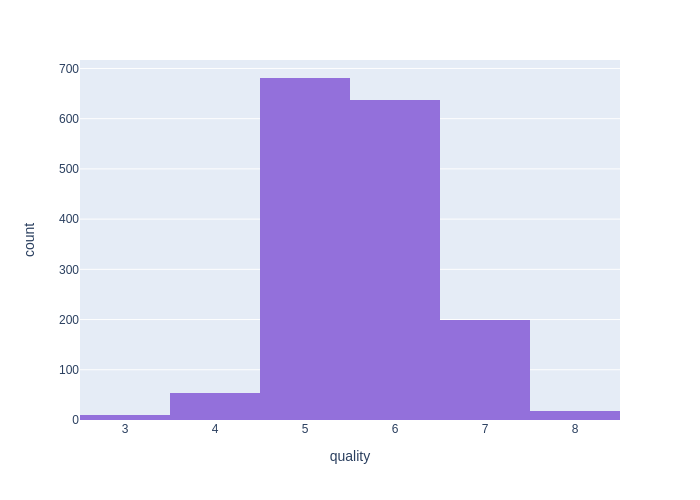

In [13]:
import plotly.express as px
fig = px.histogram(df, x="quality")
fig.update_traces(marker_color='mediumpurple')
fig.show(renderer="png")

Como esse histograma podemos observar que a qualidade dos vinhos quer seguir uma distribuição normal, com a maior frequência dos casos perto da média (5.6) e a olho nu acreditaria que 68% dos casos se encontra a +-1 desvio padrão da média.
Infelizmente não parece ser um dataset muito rico, uma vez que o pH  varia pouco e a qualidade também.

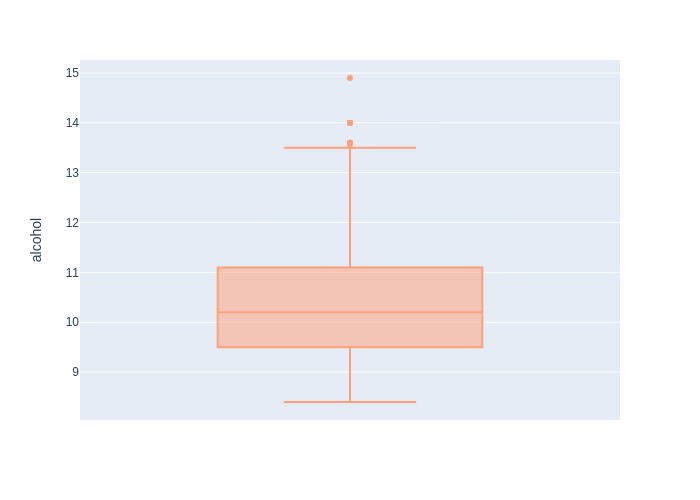

In [14]:
fig = px.box(df, y="alcohol")
fig.update_traces(marker_color='lightsalmon')
fig.show(renderer="png")

O comportamento do teor alcóolico é interessante também, dá para observar que a maioria dos valores (metade) oscila entre 9.5 e 11.1. Alguns outliers aparecem passando o limite superior. Vamos ver a relação entre teor alcóolico e qualidade:

In [15]:
test2 = df[['quality', 'alcohol']]
test = test2.groupby(['quality']).mean()
test

,alcohol
quality,
3,9.955000
4,10.265094
5,9.899706
6,10.629519
7,11.465913
8,12.094444


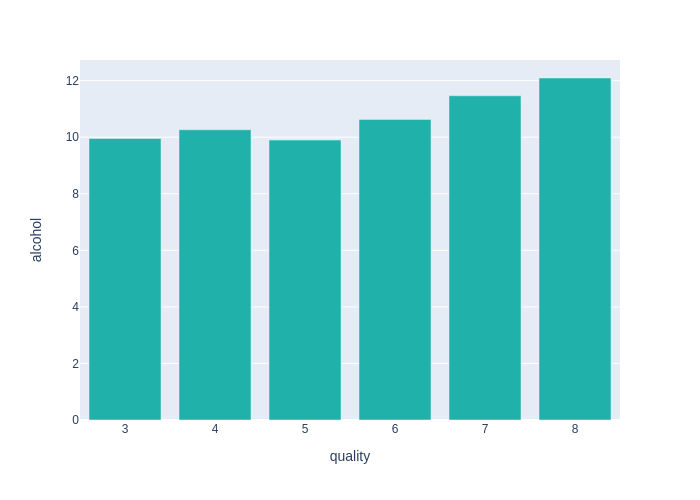

In [16]:
fig = px.bar(test, x=test.index, y="alcohol")
fig.update_traces(marker_color='lightseagreen')
fig.show(renderer="png")

Bacana, aparentemente quanto maior o teor alcóolico, melhor a 
qualidade do vinho. Bebidas melhores tem mais álcool, essa é a conclusão a partir desses dados.


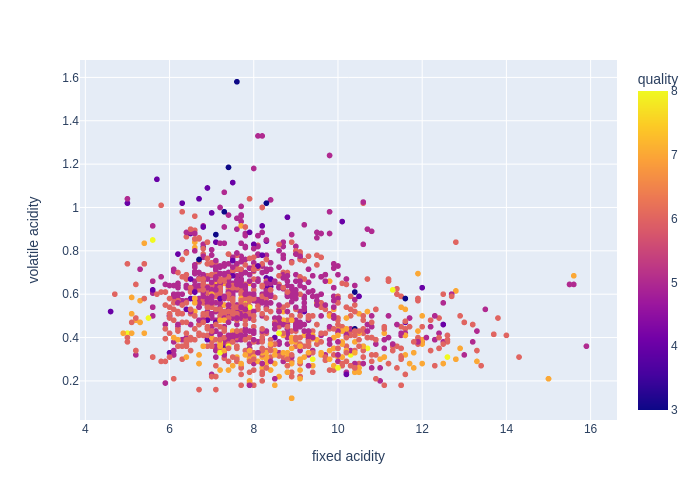

In [17]:
fig = px.scatter(df, x="fixed acidity", y="volatile acidity", color='quality')
fig.show(renderer="png")

Agora uma análise mais profunda, mas não muito conclusiva: aparentemente, vinhos que possuem baixa acidez volátil (abaixo de 0.4, mas acima de 0.2) e possuem uma acidez fixa que oscile entre 6 e 12 tendem a ter maior qualidade (bolinhas amarelas), enquanto altos níveis de acidez volátil acarretam em vinhos de menor qualidade.

Vamos adicionar mais uma variável a essa análise: a acidez cítrica:

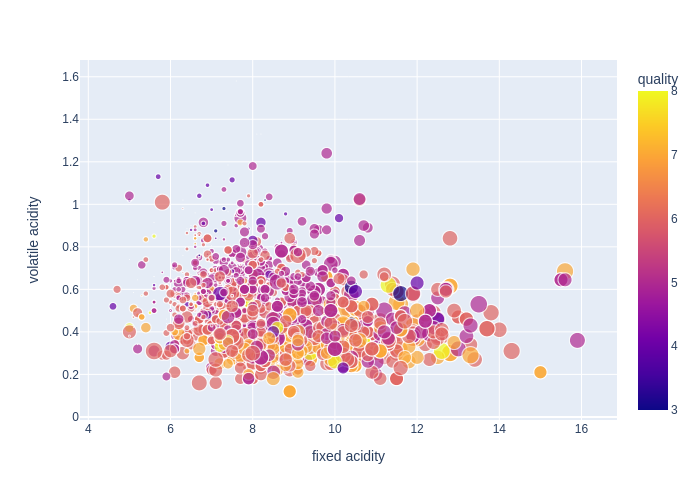

In [18]:
fig = px.scatter(df, x="fixed acidity", y="volatile acidity", color='quality', size="citric acid")
fig.show(renderer="png")

Legal, quer dizer que vinhos que têm boa qualidade e seguem o comportamente de acidez volátil e acidez fixa (explicado acima) também tem maior acidez cítricas (bolinhas maiores).

Aqui, quanto mais clara a cor, maior qualidade do vinho e quanto maior a bola, maior a acidez cítrica.

Dá para ver que as bolas maiores são as mais claras.

Além do teor alcóolico, aparentemente a acidez cítrica tem uma influência maior na nossa variável target (qualidade) comparada as demais.

# Confirmação das hipóteses

Agora, vamos confirmar as hipóteses indo as correlações:

In [19]:
cor = df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


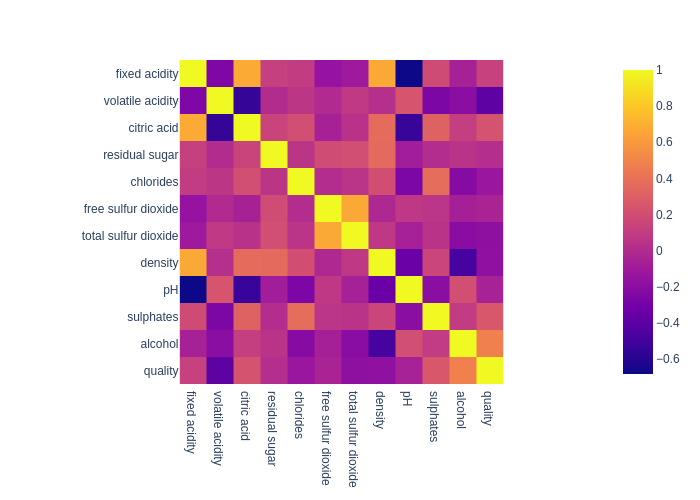

In [20]:
fig = px.imshow(cor)
fig.show(renderer="png")

Com esse mapa de calor fica claro que o teor alcóolico é a feature que mais influencia na qualidade do vinho (0.47 diretamente): ou seja, quanto maior teor alcóolico, maior qualidade do vinho. Isso confirma o que vimos no gráfico lá em cima entre teor alcóolico x qualidade. Em seguida, as variáveis mais influentes são sulfatos e acidez cítrica, mas influenciam pouco (cerca de 0.25).

Além disso, as correlações entre teor alcóolico e sulfato e teor alcóolico e acidez cítrica são baixas, o que nos dá confiança para seguir as análises.

A correlação entre acidez cítrica e sulfato é um pouquinho mais alta e isso é ruim porque pode atrapalhar as análises ao tirarmos uma das variáveis. Variáveis que não são target e tem correlações altas entre si costumam ser negativas para o modelo. Mas como a correlação é baixa (e alta comparada as outras), tudo bem.

Vamos ao modelo.

Primeiro, os imports necessários:

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

Separar a nossa variável target do resto:

In [22]:
X = df.drop('quality', axis=1)
Y = df['quality']
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Dividir entre valores de teste e treino, sendo 30% para teste e o resto para treino. Coloquei o random_state=42 para que nossas análises não sofram nenhuma disrupção por conta de aleatoriedade.

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

O modelo em si é simples. Vamos aos resultados:

In [24]:
import numpy as np
modelo = LinearRegression().fit(X_train, Y_train)

yhat_ml_test = modelo.predict(X_test)
yhat_ml_train = modelo.predict(X_train)
r2_train = r2_score(Y_train, yhat_ml_train)
r2_test = r2_score(Y_test, yhat_ml_test)

print('Resultados:')

print('-'*20)

print('Intercepto: {}'.format(modelo.intercept_))
print("Coeficiente: {}".format(modelo.coef_))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(Y_train, yhat_ml_train))))
print('R2: {}'.format(r2_train))

Resultados:
--------------------
Intercepto: 17.962578339232415
Coeficiente: [ 2.34704718e-02 -1.09961969e+00 -2.47859776e-01  7.73785620e-03
 -1.67359251e+00  4.55041815e-03 -3.26389168e-03 -1.42395563e+01
 -3.19247444e-01  8.12824701e-01  2.91991158e-01]
RMSE: 0.6486806989670354
R2: 0.36119824413213153


Como era de se esperar, a acuracidade deu bem baixa mesmo (36%). Acho improvável que melhore para os dados de teste.

In [25]:
print('Resultados Teste:')
print('-'*20)
print('RMSE: {}'.format(np.sqrt(mean_squared_error(Y_test, yhat_ml_test)))) 
print('R2: {}'.format(r2_test))

Resultados Teste:
--------------------
RMSE: 0.6412759715991394
R2: 0.3513885332505232


É, piorou na verdade. Tudo bem, vamos tirar algumas variáveis do modelo e deixar apenas as mais influentes e ver se faz alguma diferença:

In [26]:
features_relevantes = abs(cor['quality'] > 0.2)
features_relevantes

fixed acidity           False
volatile acidity        False
citric acid              True
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates                True
alcohol                  True
quality                  True
Name: quality, dtype: bool

In [27]:
X = df[['citric acid', 'sulphates', 'alcohol']]
Y = df['quality']
X

,citric acid,sulphates,alcohol
0,0.00,0.56,9.4
1,0.00,0.68,9.8
2,0.04,0.65,9.8
3,0.56,0.58,9.8
4,0.00,0.56,9.4
...,...,...,...
1594,0.08,0.58,10.5
1595,0.10,0.76,11.2
1596,0.13,0.75,11.0
1597,0.12,0.71,10.2


Como temos poucos dados, vamos aumentar a quantidade de dados de treino também:

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
modelo2 = LinearRegression().fit(X_train, Y_train)

yhat_ml_test = modelo2.predict(X_test)
yhat_ml_train = modelo2.predict(X_train)
r2_train = r2_score(Y_train, yhat_ml_train)
r2_test = r2_score(Y_test, yhat_ml_test)

print('Resultados:')

print('-'*20)

print('Intercepto: {}'.format(modelo2.intercept_))
print("Coeficiente: {}".format(modelo2.coef_))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(Y_train, yhat_ml_train))))
print('R2: {}'.format(r2_train))

Resultados:
--------------------
Intercepto: 1.449368262868452
Coeficiente: [0.485231   0.74897338 0.34056166]
RMSE: 0.6869189578566958
R2: 0.27472633941001556


Piorou.

Mas tudo bem, vamos a algumas conclusões:

o intercepto representa o efeito médio em Y (qualidade) quando X (outras features do modelo) são iguais a zero.

Assim, o efeito médio na qualdiade é de 1.44 quando as features são 0.

Para os coeficientes angulares, sabemos que:

Mantendo as outras features constantes, o acréscimo de 1 unidade na acidez cítrica acarreta em uma variação positiva de 0.48 na qualidade do vinho, assim como o acréscimo de 1 unidade nos features sulfatos e teor alcóolico (separadamente e contanto que as outras features mantenham-se constantes), a variação positiva é de 0.74 e 0.34 na qualidade do vinho. 

Nenhuma variável selecionada é inversamente proporcional nesse segundo caso, mas ao analisarmos o modelo com todas as features como X, vemos que o coeficiente angular da acidez volátil é negativo, ou seja, quanto maior a acidez volátil, menor a qualidade do vinho (como colocado em hipótese gráficos acima).

Além disso, o primeiro modelo se adequou melhor aos dados uma vez que o RMSE (raiz quadrada do erro quadrático médio) foi menor (portanto o MSE (erro quadrático médio)). O MSE é comumente usado para verificar a acurácia de modelos e dá um maior peso aos maiores erros, já que, ao ser calculado, cada erro é elevado ao quadrado individualmente e, após isso, a média desses erros quadráticos é calculada. 

Logo, o RMSE é uma métrica que nos informa a distância média entre os valores previstos do modelo e os valores reais no conjunto de dados.

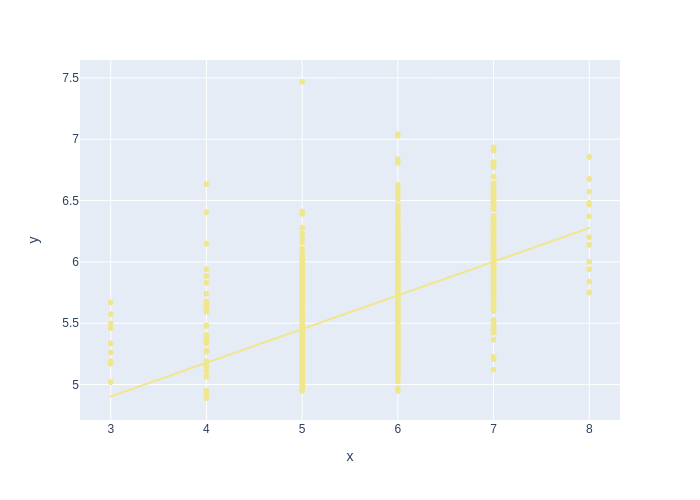

In [31]:
fig = px.scatter(x=Y_train, y=yhat_ml_train, trendline="ols")
fig.update_traces(marker_color='khaki')
fig.show(renderer="png")

Realmente, regressão linear não é o melhor algoritmo pra solucionar problemas de classificação. No começo achei que a nota atribuída à qualidade variava de 0-10 com valores reais, não inteiros.

Dá para observar nos gráficos que uma reta não seria o melhor jeito de representar esses dados.

Não por menos a acurácia deu baixa.

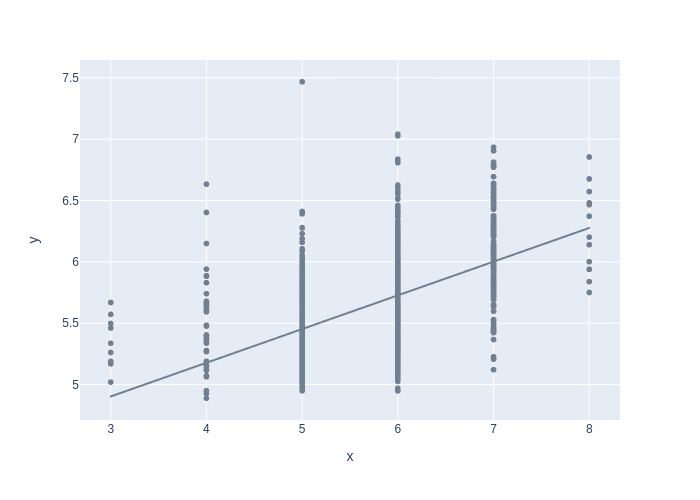

In [32]:
fig = px.scatter(x=Y_train, y=yhat_ml_train, trendline="ols")
fig.update_traces(marker_color='slategray')
fig.show(renderer="png")

No fim esse exercício mostrou de maneira bem visual porquê certos algorimtos servem para um tipo de problema proposto específico enquanto outros não.

Ficou muito claro nesses dois gráficos acima que usar uma reta para descrever o comportamento dos vinhos é ineficiente e que um algoritmo de classificação, que limita a um número discreto a chance de possibilidades de resultados (no caso 6 possibilidades, de 3 a 8 com números inteiros apenas) seria melhor do que a regressão linear, que prevê valores reais de 3 a 8, ou seja, na teoria infinitos valores.